In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

In [2]:
cars_flag = True
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [7]:
print(X.shape)
print(y.shape)

(1728, 6)
(1728,)


In [14]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
vscore = []
sse = []
for i in range(1,8):
    km = KMeans(n_clusters=i, n_jobs=-1)
    km.fit(X)
    sse.append(km.score(X))
    y_pred = km.predict(X)
    vscore.append(metrics.v_measure_score(y, y_pred))

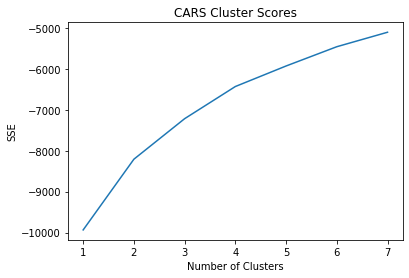

In [18]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(range(1,8), sse)

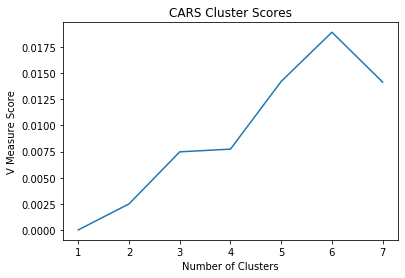

In [17]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("V Measure Score")
plt.plot(range(1,8), vscore)

In [25]:
vscore = []
vtotals= []
sse = []
stotals = []

for n_iter in (300,600):
    for i in range(1,8):
        km = KMeans(n_clusters=i, max_iter=n_iter, n_jobs=-1)
        km.fit(X)
        sse.append(km.score(X))
        y_pred = km.predict(X)
        vscore.append(metrics.v_measure_score(y, y_pred))
    vtotals.append(vscore)
    vscore = []
    stotals.append(sse)
    sse = []

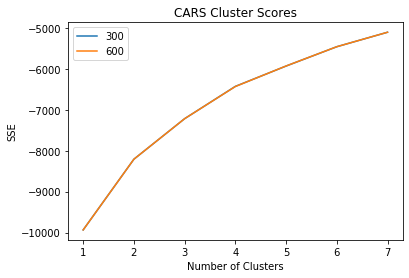

In [27]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(range(1,8), stotals[0], label="300")
plt.plot(range(1,8), stotals[1], label="600")
plt.legend(loc='best')

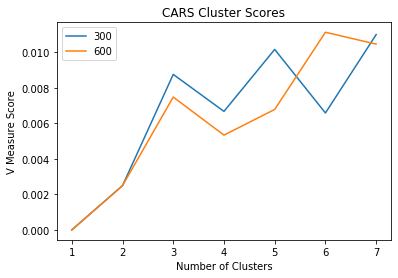

In [26]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("V Measure Score")
plt.plot(range(1,8), vtotals[0], label="300")
plt.plot(range(1,8), vtotals[1], label="600")
plt.legend(loc='best')

In [28]:
vscore = []
vtotals= []
sse = []
stotals = []

for inits in (10,20,30):
    for i in range(1,8):
        km = KMeans(n_clusters=i, n_init=inits, n_jobs=-1)
        km.fit(X)
        sse.append(km.score(X))
        y_pred = km.predict(X)
        vscore.append(metrics.v_measure_score(y, y_pred))
    vtotals.append(vscore)
    vscore = []
    stotals.append(sse)
    sse = []    

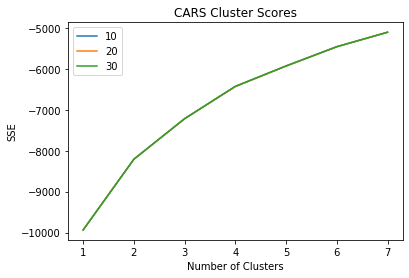

In [31]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(range(1,8), stotals[0], label="10")
plt.plot(range(1,8), stotals[1], label="20")
plt.plot(range(1,8), stotals[2], label="30")
plt.legend(loc='best')

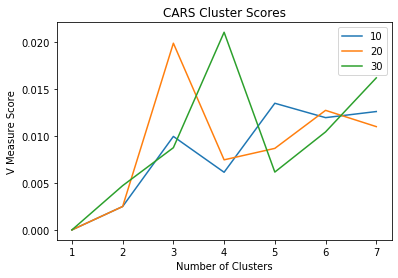

In [30]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("V Measure Score")
plt.plot(range(1,8), vtotals[0], label="10")
plt.plot(range(1,8), vtotals[1], label="20")
plt.plot(range(1,8), vtotals[2], label="30")
plt.legend(loc='best')

In [32]:
vscore = []
vtotals= []
sse = []
stotals = []

for tols in (.0001,.00001, .000001):
    for i in range(1,8):
        km = KMeans(n_clusters=i, tol=tols, n_jobs=-1)
        km.fit(X)
        sse.append(km.score(X))
        y_pred = km.predict(X)
        vscore.append(metrics.v_measure_score(y, y_pred))
    vtotals.append(vscore)
    vscore = []
    stotals.append(sse)
    sse = []      

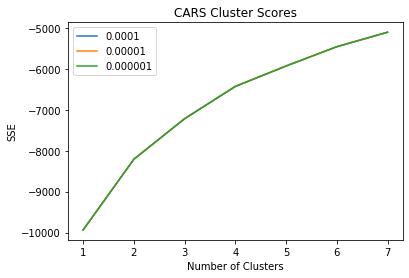

In [34]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(range(1,8), stotals[0], label="0.0001")
plt.plot(range(1,8), stotals[1], label="0.00001")
plt.plot(range(1,8), stotals[2], label="0.000001")
plt.legend(loc='best')

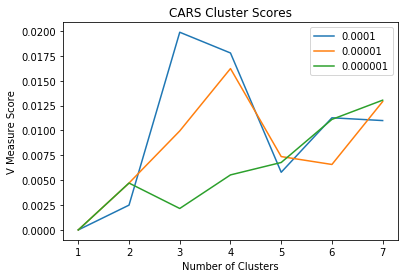

In [33]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("V Measure Score")
plt.plot(range(1,8), vtotals[0], label="0.0001")
plt.plot(range(1,8), vtotals[1], label="0.00001")
plt.plot(range(1,8), vtotals[2], label="0.000001")
plt.legend(loc='best')

In [20]:
score = []
for i in range(1,8):
    km = KMeans(n_clusters=i, n_init=600, tol=0.0001, n_jobs=-1)
    km.fit(X)
    y_pred = km.predict(X)
    score.append(metrics.v_measure_score(y, y_pred))

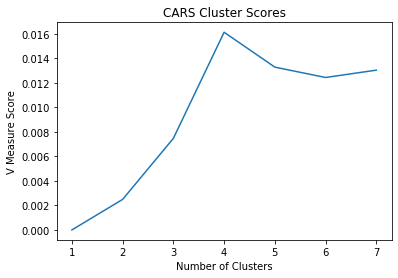

In [21]:
plt.title("CARS Cluster Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("V Measure Score")
plt.plot(range(1,8), totals[0])